#DA R2 : Naive Bayes algorithm for classification on  Pima Indians Diabetes dataset.

##Mathematical Model

Let S be the system set:

S = {s; e;X; Y; Fme;DD;NDD; Fc; Sc}
where Dataset is loaded into the dataframe

s=start state 

e=end state i.e. classification of samples from the test dataset

X=set of inputs
X = {X1}
    where X1 =  Pima Indians Diabetes dataset (768 records, 8 columns)

Y=set of outputs
  Y = {Y1, Y2}
1. Confusion Matrix
2. Accuracy Score
  
Fme is the set of main functions
  Fme = {f1,f2,f3, f4} where
1. f1 = function to load dataset into dataframe
2. f2 = function to split dataset into training and test datasets
3. f3 = function to Normalize dataset
4. f4 = function to invoke Naive Bayes classifier
    
DD = Deterministic Data
  PIMA Indians diabetes dataset

NDD = Non-deterministic data
  null values in the dataset 

Fc = failure case
  Failed to classify the record into correct class 

##Dataset Description

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years.

Fields description follow:
1. Pregnancies = Number of times pregnant
2. Glucose = Plasma glucose concentration
3. BloodPressure = Diastolic blood pressure (mm Hg)
4. SkinThickness = Triceps skin fold thickness (mm)
5. Insulin = 2-Hour serum insulin (mu U/ml)
6. BMI = Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction = Diabetes pedigree function
8. Age = Age (years)
9. Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

##Flowchart

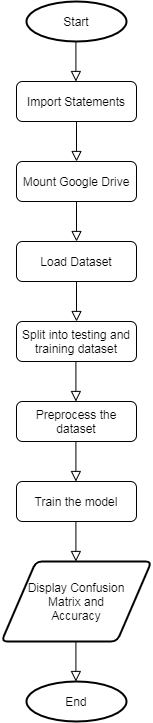

##Import Libraries

In [ ]:
#Import Statements

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

##Mounting the Drive

In [ ]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load Dataset

In [ ]:
#Load the Dataset

df = pd.read_csv('/content/drive/My Drive/pima_indians/diabetes.csv')
y = df['Outcome']
x = df.drop(['Outcome'],axis=1)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Describing the dataset

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##Correlation Matrix

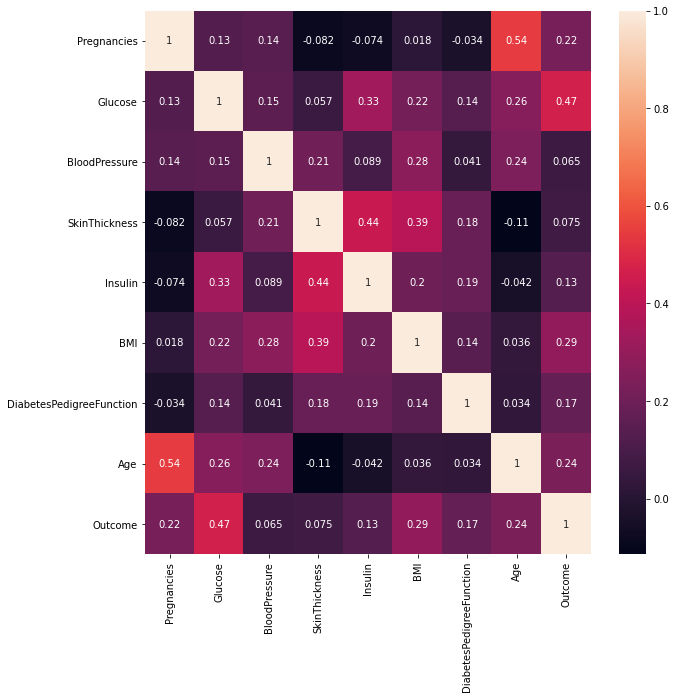

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True) 

##Splitting the dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

##Training the dataset

In [ ]:
model = GaussianNB()
std_scaler = StandardScaler()

x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

##Output

In [ ]:
confusion_matrix(y_test,y_pred)

array([[109,  16],
       [ 33,  34]])

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7447916666666666


##Modification

In [ ]:
df_all_ones = df[df['Outcome']==1]

y2 = df_all_ones['Outcome']
x2 = df_all_ones.drop(['Outcome'],axis=1)

y_pred2 = model.predict(x2)

print(confusion_matrix(y2,y_pred2))
print(accuracy_score(y2, y_pred2))


[[268]]
1.0
